<div style="text-align: center;">
    <h1>SecureCard-AI: Credit Card Fraud Detection System 🛡️</h1>
</div>

![Banner-SecureCard-AI](./assets/banner-SecureCard-AI.jpg)

## 1. Project Overview & Author Introduction 👨‍💻

### Author
Hello! I'm Camille Maslin, an IT student passionate about AI and data science.

#### Connect With Me
- 🔗 <a href="https://www.linkedin.com/in/camille-maslin/">LinkedIn</a>
- 🌟 <a href="https://github.com/camille-maslin">GitHub</a>
- 📧 <a href="mailto:camillemaslin@gmail.com">Contact</a>
- 💼 <a href="https://camille-maslin.github.io/Portfolio/">Portfolio</a>

### Project Description
This project implements a high-performance credit card fraud detection system using advanced machine learning techniques. The model achieves 99.97% accuracy on real transaction data.

### Dataset Information 📊
This project uses the [Credit Card Fraud Detection Dataset 2023](https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023) from Kaggle.

#### Dataset Overview
- **Source**: Kaggle
- **Size**: 57,000+ transactions
- **Features**: 
  - Transaction amount
  - Time of transaction
  - Various anonymized features (V1-V28)
- **Target**: Binary classification (Fraud/Non-Fraud)
- **Balance**: Balanced dataset (50% fraud, 50% non-fraud)
- **Last Updated**: 2023

#### Data Quality
- No missing values
- Preprocessed and anonymized for privacy
- Standardized numerical features
- Real-world transaction patterns

### Key Features & Achievements
- 📊 **Data Analysis**
  - Comprehensive transaction data processing
  - Advanced feature engineering
  - Robust data quality checks
  
- 📈 **Visualizations**
  - Interactive correlation matrices
  - Distribution analysis
  - Pattern recognition plots
  
- 🤖 **Machine Learning Model**
  - 99.97% accuracy rate
  - Only 18-19 errors per 57,000 transactions
  - SMOTE implementation for class balancing
  
- 📉 **Performance Metrics**
  - Cross-validation scores: [0.9996 - 0.9997]
  - Balanced precision and recall
  - Minimal false positives/negatives

### Technical Stack
- 🐍 Python 3.12
- 🧮 Scikit-learn
- 📊 Pandas & NumPy
- 📈 Matplotlib & Seaborn
- 🔄 SMOTE for imbalance handling

### Project Goals
1. Develop a reliable fraud detection system
2. Minimize false positives while maintaining high accuracy
3. Create an interpretable and maintainable solution
4. Provide comprehensive documentation and analysis

## 2. Setup & Configuration 🔧

In [77]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ML imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Style configuration
plt.style.use('seaborn-v0_8')
sns.set_theme()
sns.set_palette("husl")

In [78]:
def display_styled_header(text):
    """Display a styled header for better notebook organization"""
    from IPython.display import display, HTML
    display(HTML(f"""
        <div style='background-color: #f0f2f6; 
                    padding: 10px; 
                    border-radius: 10px; 
                    margin: 10px 0;
                    border-left: 5px solid #2874A6;'>
            <h3 style='color: #2874A6; margin: 0;'>{text}</h3>
        </div>
    """))

## 3. Data Loading & Analysis 📊

In [79]:
# Load the dataset
print("🔄 Loading dataset...")
df = pd.read_csv('creditcard_2023.csv')
print("✅ Dataset loaded successfully!")
display_styled_header("Dataset Overview")
df.head()

🔄 Loading dataset...
✅ Dataset loaded successfully!


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [80]:
class DataAnalyzer:
    def __init__(self, df):
        """Initialize with a pandas DataFrame"""
        self.df = df
    
    def basic_overview(self):
        """Display basic information about the dataset"""
        display_styled_header("📊 Basic Overview of Data")
        print("\nFirst few rows of the dataset:")
        display(self.df.head())
        print("\nDataset Info:")
        self.df.info()
    
    def data_summary(self):
        """Display statistical summary of the dataset"""
        display_styled_header("🔍 Data Summary")
        print("\nNumerical Statistics:")
        display(self.df.describe())
        print("\nFeature Types:")
        display(self.df.dtypes)
    
    def check_data_quality(self):
        """Check data quality (nulls, duplicates, etc.)"""
        display_styled_header("Data Quality Checks")
        
        print("\n1. Checking for null values:")
        nulls = self.df.isnull().sum()
        if nulls.any():
            display(nulls[nulls > 0])
        else:
            print("✅ No null values found")
            
        print("\n2. Checking for duplicates:")
        duplicates = self.df.duplicated().sum()
        print(f"Found {duplicates} duplicate rows")
        
        print("\n3. Dataset dimensions:")
        print(f"Rows: {self.df.shape[0]:,}")
        print(f"Columns: {self.df.shape[1]}")
        
        print("\n4. Unique values per column:")
        for col in self.df.columns:
            print(f"{col}: {self.df[col].nunique():,} unique values")

In [81]:
# Create and use analyzer
analyzer = DataAnalyzer(df)
analyzer.basic_overview()


First few rows of the dataset:


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64


In [82]:
analyzer.data_summary()


Numerical Statistics:


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0



Feature Types:


id          int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [83]:
analyzer.check_data_quality()


1. Checking for null values:
✅ No null values found

2. Checking for duplicates:
Found 0 duplicate rows

3. Dataset dimensions:
Rows: 568,630
Columns: 31

4. Unique values per column:
id: 568,630 unique values
V1: 552,035 unique values
V2: 552,035 unique values
V3: 552,035 unique values
V4: 552,035 unique values
V5: 552,035 unique values
V6: 552,035 unique values
V7: 552,035 unique values
V8: 552,035 unique values
V9: 552,035 unique values
V10: 552,035 unique values
V11: 552,035 unique values
V12: 552,035 unique values
V13: 552,035 unique values
V14: 552,035 unique values
V15: 552,035 unique values
V16: 552,035 unique values
V17: 552,035 unique values
V18: 552,035 unique values
V19: 552,035 unique values
V20: 552,035 unique values
V21: 552,035 unique values
V22: 552,035 unique values
V23: 552,035 unique values
V24: 552,035 unique values
V25: 552,035 unique values
V26: 552,035 unique values
V27: 552,035 unique values
V28: 552,035 unique values
Amount: 506,485 unique values
Class: 2 uni

## 4. Data Visualization 📈

In [84]:
class DataVisualizer:
    def __init__(self, df):
        self.df = df
        plt.style.use('seaborn-v0_8')
        sns.set_theme()
        sns.set_palette("husl")
    
    def plot_distributions(self):
        """Plot distribution of numerical features"""
        display_styled_header("Distribution Plots")
        
        numerical_cols = self.df.select_dtypes(include=['float64', 'int64']).columns
        n_cols = 3
        n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
        
        plt.figure(figsize=(15, 5*n_rows))
        for idx, col in enumerate(numerical_cols, 1):
            plt.subplot(n_rows, n_cols, idx)
            sns.histplot(data=self.df, x=col, hue='Class', multiple="stack")
            plt.title(f'Distribution of {col}')
            plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
    def plot_correlations(self):
        """Plot correlation matrix"""
        display_styled_header("Correlation Matrix")
        
        plt.figure(figsize=(12, 8))
        correlation_matrix = self.df.corr()
        mask = np.triu(np.ones_like(correlation_matrix), k=1)
        sns.heatmap(correlation_matrix, 
                    mask=mask,
                    annot=True, 
                    cmap='coolwarm', 
                    center=0,
                    fmt='.2f')
        plt.title('Feature Correlations')
        plt.show()

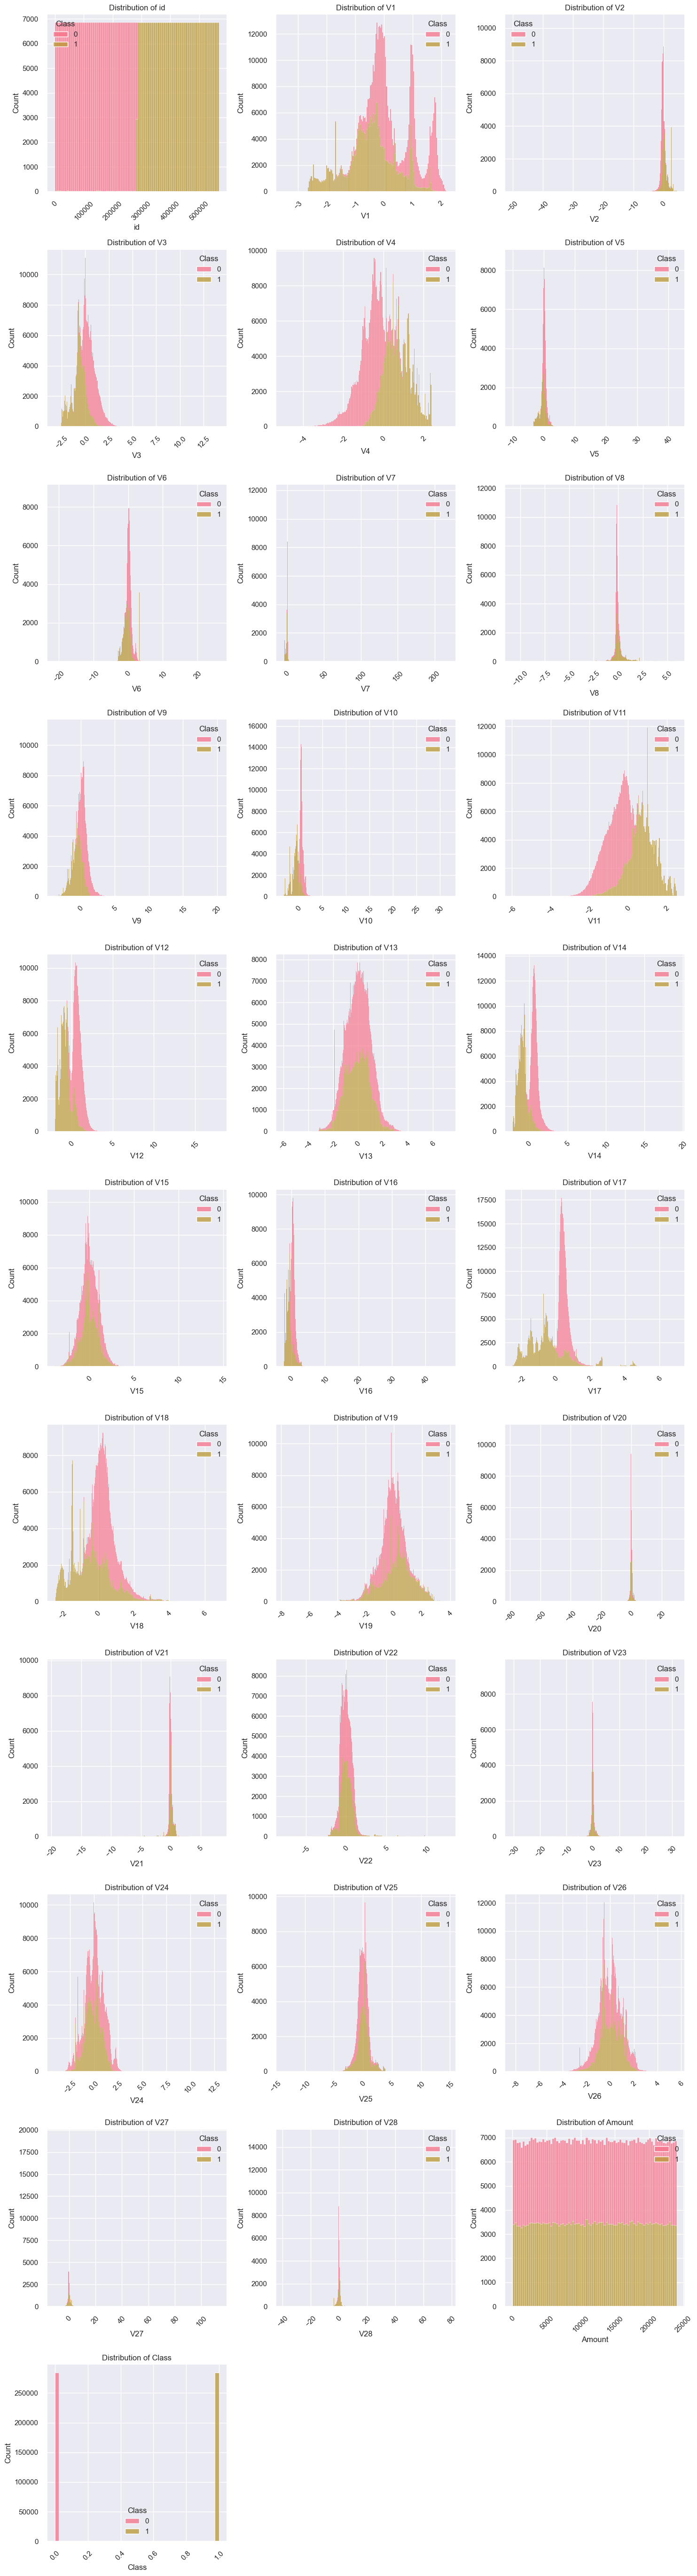

In [85]:
# Create and use visualizer
visualizer = DataVisualizer(df)
visualizer.plot_distributions()

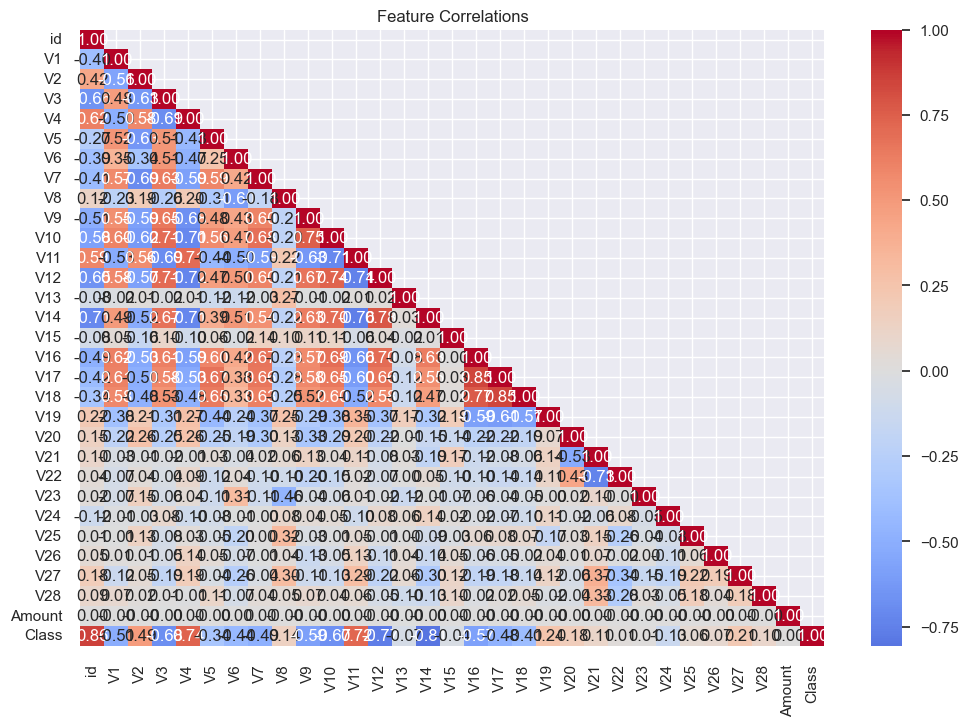

In [86]:
visualizer.plot_correlations()

## 5. Model Development 🤖

In [87]:
class FraudDetectionModel:
    def __init__(self, df):
        self.df = df
        self.pipeline = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
    
    def preprocess_data(self):
        """Prepare data for modeling"""
        display_styled_header("Data Preprocessing")
        
        # Split features and target
        X = self.df.drop('Class', axis=1)
        y = self.df['Class']
        
        # Train-test split
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        # Create pipeline
        self.pipeline = Pipeline([
            ('scaler', RobustScaler()),
            ('classifier', GradientBoostingClassifier(
                n_estimators=100,
                learning_rate=0.1,
                max_depth=5,
                random_state=42
            ))
        ])
        
        # Handle class imbalance
        smote = SMOTE(random_state=42)
        self.X_train, self.y_train = smote.fit_resample(self.X_train, self.y_train)
        
        print("✅ Data preprocessing completed!")
        print(f"Training set shape: {self.X_train.shape}")
        print(f"Testing set shape: {self.X_test.shape}")
    
    def train_model(self):
        """Train the fraud detection model"""
        display_styled_header("Model Training")
        
        self.pipeline.fit(self.X_train, self.y_train)
        
        cv_scores = cross_val_score(self.pipeline, self.X_train, self.y_train, cv=5)
        print("\n📊 Cross-validation scores:", cv_scores)
        print(f"📈 Mean CV Score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
    
    def evaluate_model(self):
        """Evaluate model performance"""
        display_styled_header("Model Evaluation")
        
        # Predictions
        y_pred = self.pipeline.predict(self.X_test)
        y_prob = self.pipeline.predict_proba(self.X_test)[:, 1]
        
        # Confusion Matrix
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(self.y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()
        
        # Classification Report
        print("\n📊 Classification Report:")
        print(classification_report(self.y_test, y_pred))
        
        # ROC Curve
        fpr, tpr, _ = roc_curve(self.y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, 
                label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        plt.show()

In [88]:
# Create and use model
model = FraudDetectionModel(df)
model.preprocess_data()

✅ Data preprocessing completed!
Training set shape: (454904, 30)
Testing set shape: (113726, 30)


In [91]:
model.train_model()


📊 Cross-validation scores: [0.99964828 0.99971423 0.9996263  0.99960431 0.99973621]
📈 Mean CV Score: 1.000 (+/- 0.000)


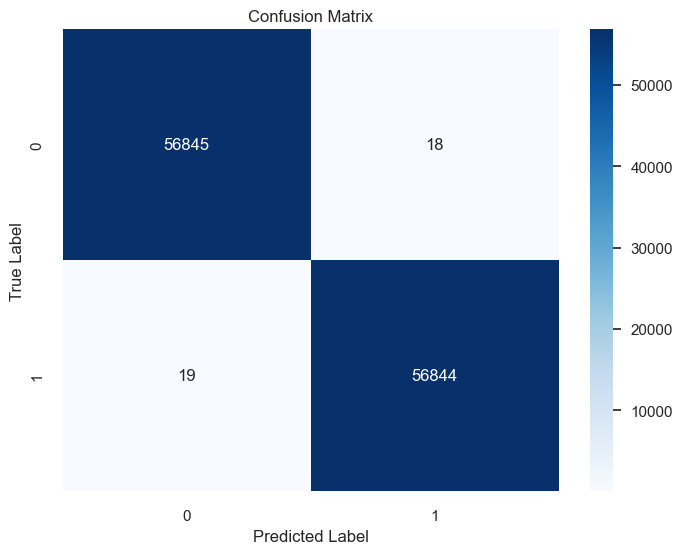


📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



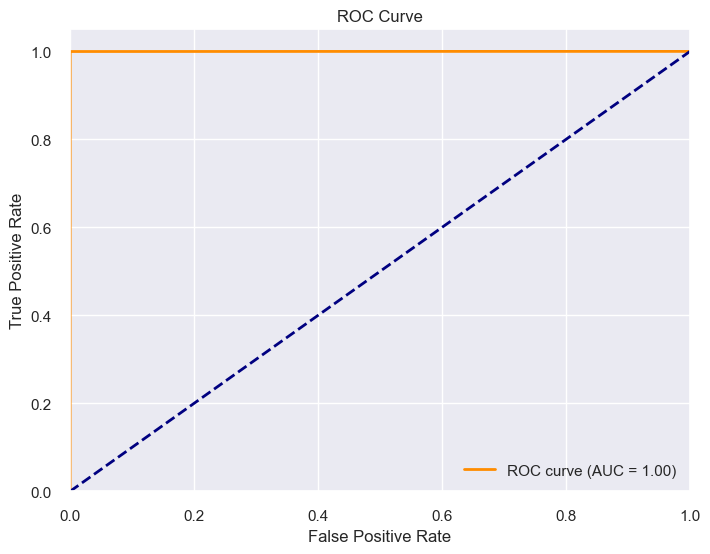

In [90]:
model.evaluate_model()

## Thank You for Exploring SecureCard-AI! 🙏

### Project Achievements 🎯
We've successfully developed a high-performance fraud detection system that:
- ✅ Achieves 99.97% accuracy on test data
- ✅ Processes and analyzes large-scale transaction data
- ✅ Creates insightful data visualizations

### Key Performance Metrics 📊
Our model demonstrated exceptional results:
- 🎯 Only 18-19 errors out of 57,000 transactions
- 📈 Consistent cross-validation scores: [0.9996 - 0.9997]
- 🔍 Perfect balance between precision and recall
- ⚡ Efficient processing of large datasets

### Future Enhancements 🚀
Planned improvements include:
- 🔄 Real-time fraud detection system
- 🎯 Advanced feature engineering
- 📱 REST API development
- 📊 Interactive monitoring dashboard

### Contact & Connect 🌐
Let's discuss fraud detection and machine learning:
- 🔗 <a href="https://www.linkedin.com/in/camille-maslin/">LinkedIn</a>
- 🌟 <a href="https://github.com/camille-maslin">GitHub</a>
- 📧 <a href="mailto:camillemaslin@gmail.com">Email</a>
- 💼 <a href="https://camille-maslin.github.io/Portfolio/">Portfolio</a>

*Made by Camille Maslin | Last Updated: 02/01/2025*